In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import time

import fannypack
from lib import dpf, panda_models, panda_datasets, panda_training, omnipush_datasets

print(torch.__version__, np.__version__)

1.4.0 1.18.1


In [9]:
def eval_experiment(experiment_name, true_initial=True):
    # Experiment configuration
    dynamics_model = panda_models.PandaDynamicsModel(units=32)
    measurement_model = panda_models.PandaMeasurementModel(units=64)

    pf_model = panda_models.PandaParticleFilterNetwork(
        dynamics_model,
        measurement_model
    )

    # Create buddy
    buddy = fannypack.utils.Buddy(
        experiment_name,
        pf_model,
        optimizer_names=["e2e", "dynamics", "dynamics_recurrent", "measurement"]
    )
    
    # Load eval data
    dataset_args = buddy.metadata
    eval_trajectories = panda_datasets.load_trajectories(
        ("data/gentle_push_10.hdf5", 1),
        **dataset_args
    )
    
    # Plotting, etc
    phases = [
        'phase_0_dynamics_pretrain',
        'phase_1_dynamics_pretrain_recurrent',
        'phase_2_measurement_pretrain',
        'phase_3_end_to_end_trained'
    ]
    for phase in phases:
        try:
            buddy.load_checkpoint(label=phase)
        except FileNotFoundError:
            print(f"Skipping {phase}")
            continue

        print(f"Evaluating {phase}")
        pf_model.dynamics_model.state_noise_stddev = (0.02, 0.02)
        panda_training.rollout_and_eval(
            pf_model,
            eval_trajectories,
            start_time=0,
            max_timesteps=1000,
            particle_count=200,
            noisy_dynamics=True,
            true_initial=true_initial)


[buddy-dpf_mujoco_blackout0] Using device: cuda
[buddy-dpf_mujoco_blackout0] Loaded metadata: {'image_blackout_ratio': 0, 'use_haptics': True, 'use_proprioception': True, 'use_vision': True, 'vision_interval': 2}
[buddy-dpf_mujoco_blackout0] Read checkpoint from path: checkpoints/dpf_mujoco_blackout0-0000000000195787.ckpt
[buddy-dpf_mujoco_blackout0] Loaded checkpoint at step: 195787
[buddy-dpf_mujoco_blackout0] Read checkpoint from path: checkpoints/dpf_mujoco_blackout0-phase_0_dynamics_pretrain.ckpt
[buddy-dpf_mujoco_blackout0] Loaded checkpoint at step: 37345
Evaluating phase_0_dynamics_pretrain


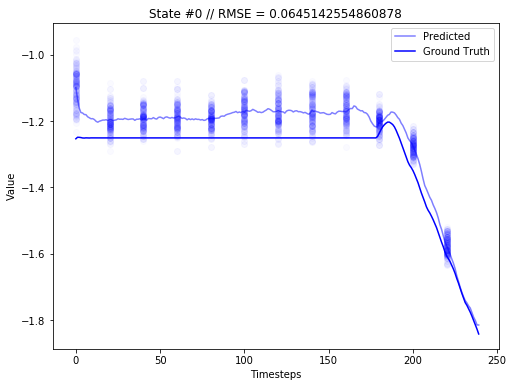

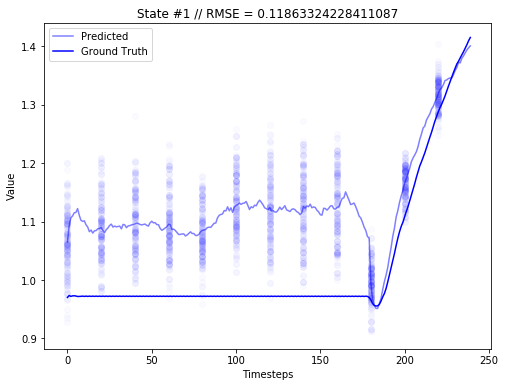

[buddy-dpf_mujoco_blackout0] Read checkpoint from path: checkpoints/dpf_mujoco_blackout0-phase_1_dynamics_pretrain_recurrent.ckpt
[buddy-dpf_mujoco_blackout0] Loaded checkpoint at step: 41097
Evaluating phase_1_dynamics_pretrain_recurrent


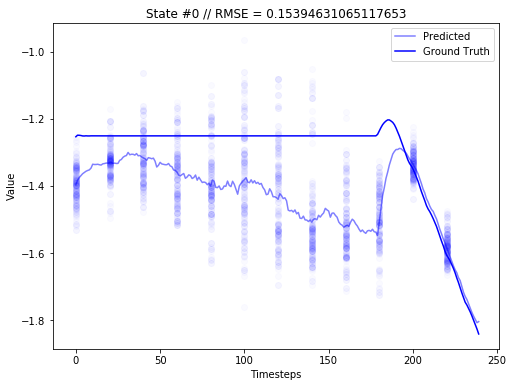

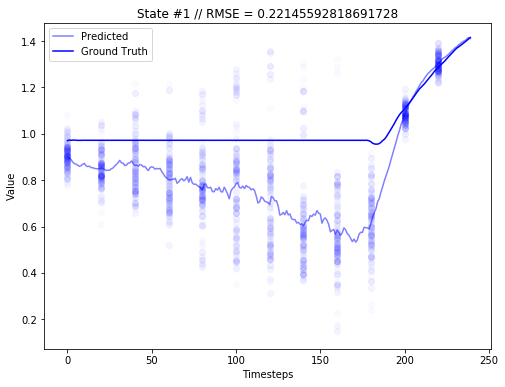

[buddy-dpf_mujoco_blackout0] Read checkpoint from path: checkpoints/dpf_mujoco_blackout0-phase_2_measurement_pretrain.ckpt
[buddy-dpf_mujoco_blackout0] Loaded checkpoint at step: 191097
Evaluating phase_2_measurement_pretrain


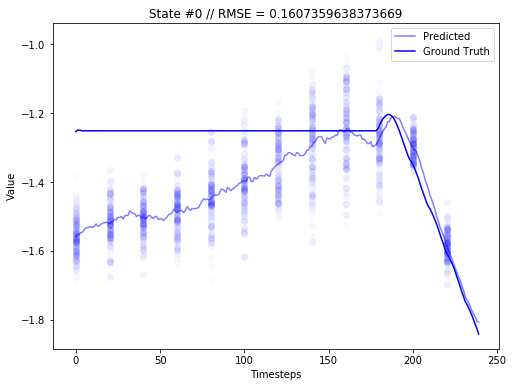

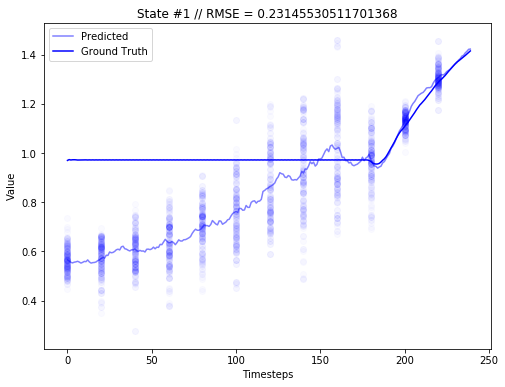

[buddy-dpf_mujoco_blackout0] Read checkpoint from path: checkpoints/dpf_mujoco_blackout0-phase_3_end_to_end_trained.ckpt
[buddy-dpf_mujoco_blackout0] Loaded checkpoint at step: 195787
Evaluating phase_3_end_to_end_trained


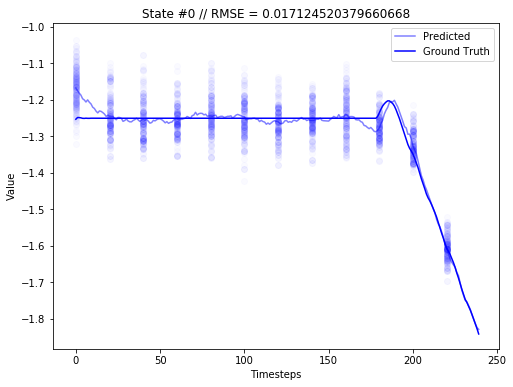

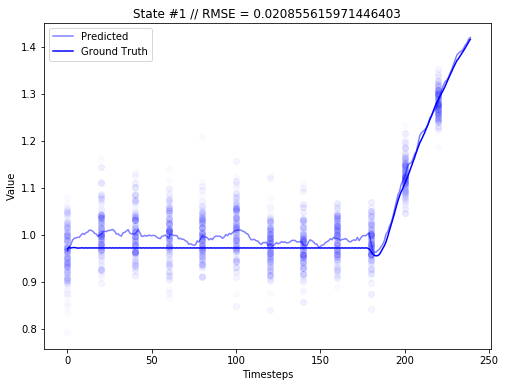

In [10]:
eval_experiment("dpf_mujoco_blackout0")

[buddy-dpf_mujoco_blackout4] Using device: cuda
[buddy-dpf_mujoco_blackout4] Loaded metadata: {'image_blackout_ratio': 0.4, 'use_haptics': True, 'use_proprioception': True, 'use_vision': True, 'vision_interval': 2}
[buddy-dpf_mujoco_blackout4] Read checkpoint from path: checkpoints/dpf_mujoco_blackout4-0000000000195787.ckpt
[buddy-dpf_mujoco_blackout4] Loaded checkpoint at step: 195787
[buddy-dpf_mujoco_blackout4] Read checkpoint from path: checkpoints/dpf_mujoco_blackout4-phase_0_dynamics_pretrain.ckpt
[buddy-dpf_mujoco_blackout4] Loaded checkpoint at step: 37345
Evaluating phase_0_dynamics_pretrain


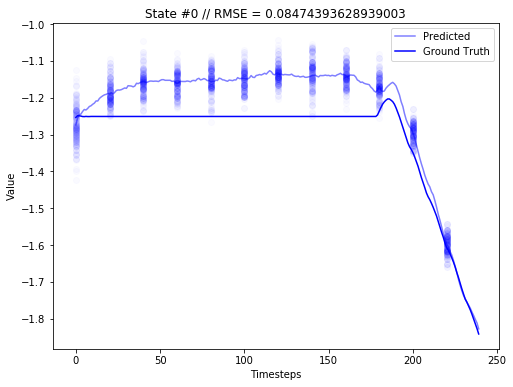

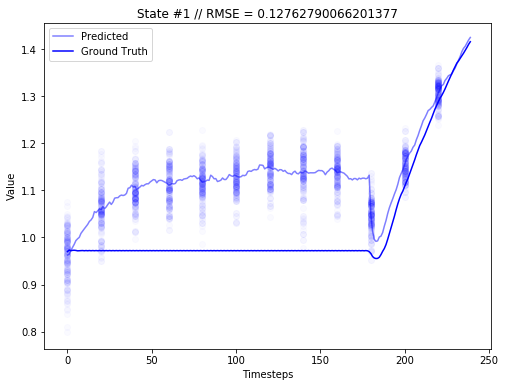

[buddy-dpf_mujoco_blackout4] Read checkpoint from path: checkpoints/dpf_mujoco_blackout4-phase_1_dynamics_pretrain_recurrent.ckpt
[buddy-dpf_mujoco_blackout4] Loaded checkpoint at step: 41097
Evaluating phase_1_dynamics_pretrain_recurrent


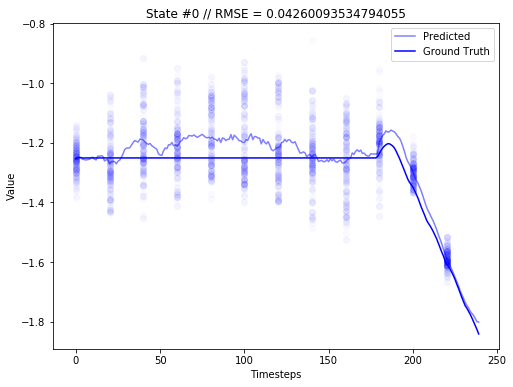

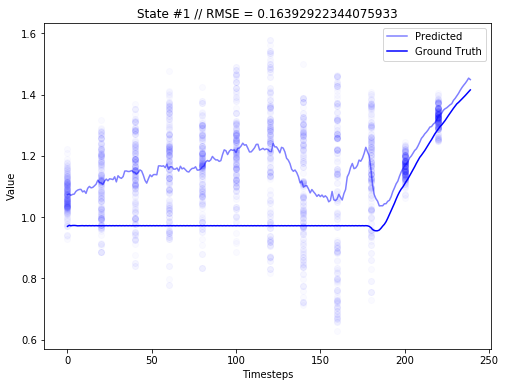

[buddy-dpf_mujoco_blackout4] Read checkpoint from path: checkpoints/dpf_mujoco_blackout4-phase_2_measurement_pretrain.ckpt
[buddy-dpf_mujoco_blackout4] Loaded checkpoint at step: 191097
Evaluating phase_2_measurement_pretrain


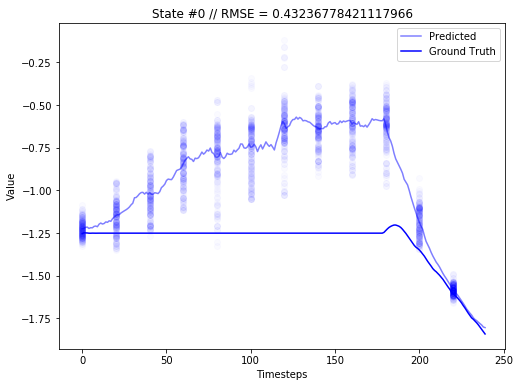

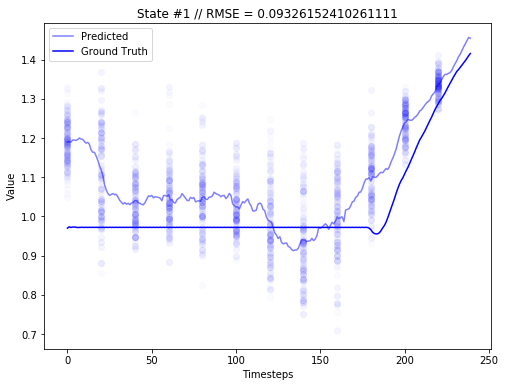

[buddy-dpf_mujoco_blackout4] Read checkpoint from path: checkpoints/dpf_mujoco_blackout4-phase_3_end_to_end_trained.ckpt
[buddy-dpf_mujoco_blackout4] Loaded checkpoint at step: 195787
Evaluating phase_3_end_to_end_trained


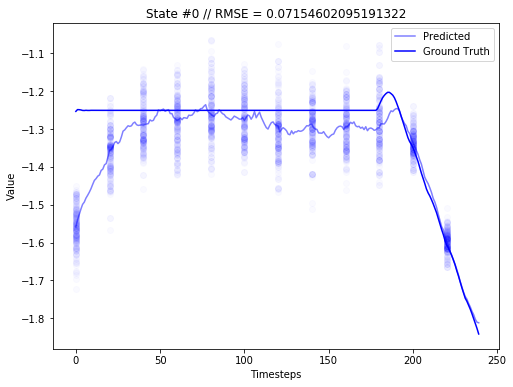

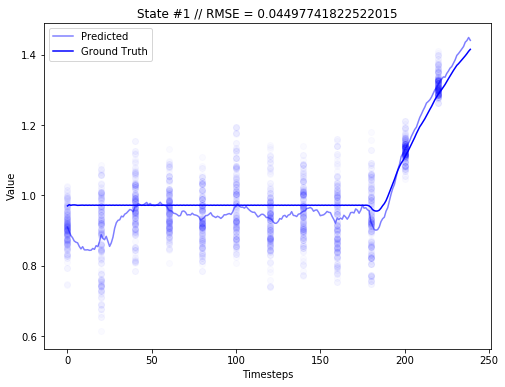

In [11]:
eval_experiment("dpf_mujoco_blackout4")

[buddy-dpf_mujoco_blackout8] Using device: cuda
[buddy-dpf_mujoco_blackout8] Loaded metadata: {'image_blackout_ratio': 0.8, 'use_haptics': True, 'use_proprioception': True, 'use_vision': True, 'vision_interval': 2}
[buddy-dpf_mujoco_blackout8] Read checkpoint from path: checkpoints/dpf_mujoco_blackout8-0000000000195787.ckpt
[buddy-dpf_mujoco_blackout8] Loaded checkpoint at step: 195787
[buddy-dpf_mujoco_blackout8] Read checkpoint from path: checkpoints/dpf_mujoco_blackout8-phase_0_dynamics_pretrain.ckpt
[buddy-dpf_mujoco_blackout8] Loaded checkpoint at step: 37345
Evaluating phase_0_dynamics_pretrain


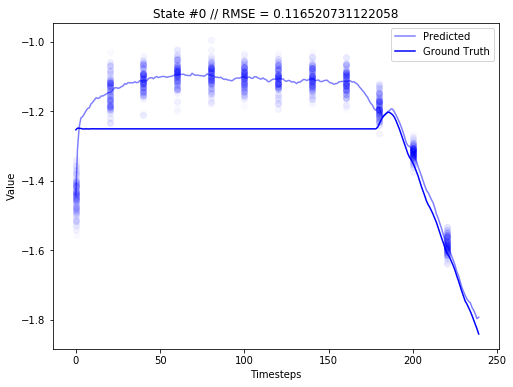

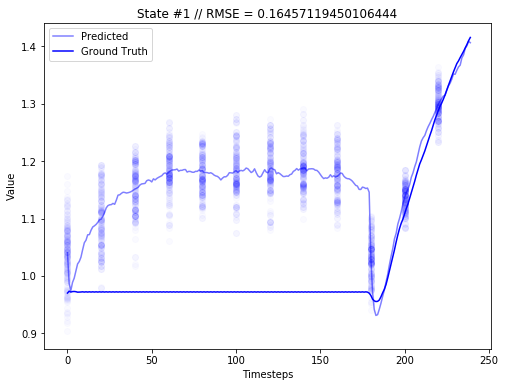

[buddy-dpf_mujoco_blackout8] Read checkpoint from path: checkpoints/dpf_mujoco_blackout8-phase_1_dynamics_pretrain_recurrent.ckpt
[buddy-dpf_mujoco_blackout8] Loaded checkpoint at step: 41097
Evaluating phase_1_dynamics_pretrain_recurrent


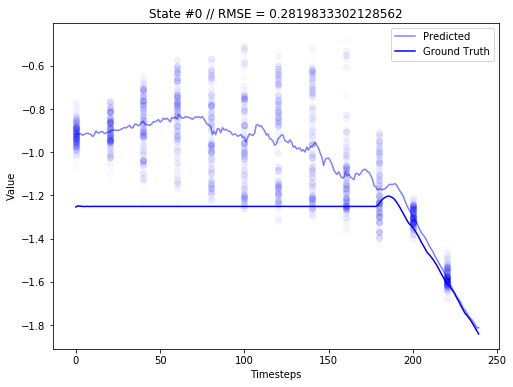

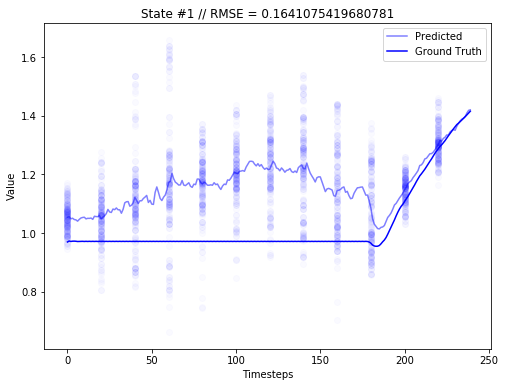

[buddy-dpf_mujoco_blackout8] Read checkpoint from path: checkpoints/dpf_mujoco_blackout8-phase_2_measurement_pretrain.ckpt
[buddy-dpf_mujoco_blackout8] Loaded checkpoint at step: 191097
Evaluating phase_2_measurement_pretrain


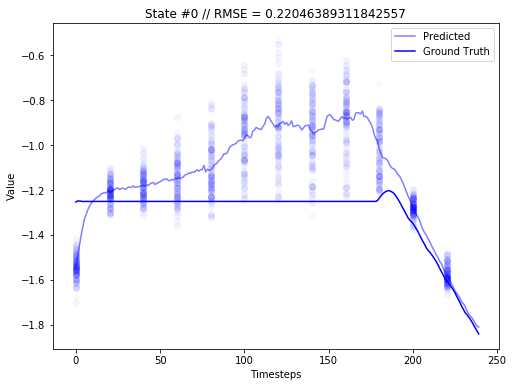

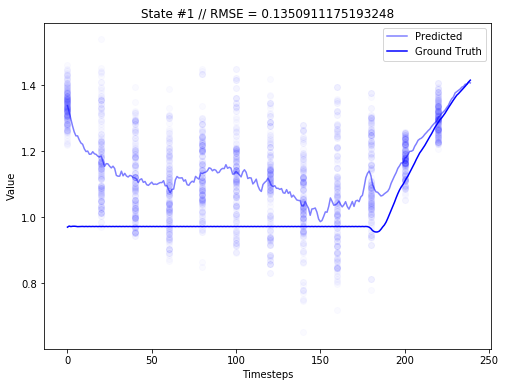

[buddy-dpf_mujoco_blackout8] Read checkpoint from path: checkpoints/dpf_mujoco_blackout8-phase_3_end_to_end_trained.ckpt
[buddy-dpf_mujoco_blackout8] Loaded checkpoint at step: 195787
Evaluating phase_3_end_to_end_trained


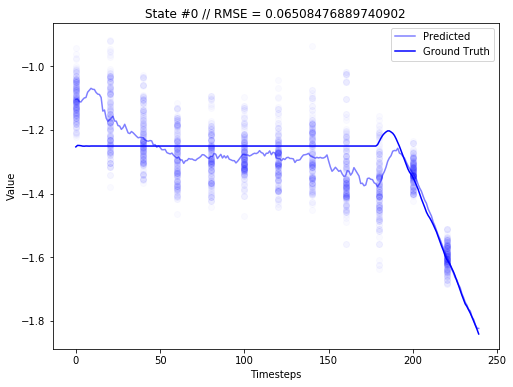

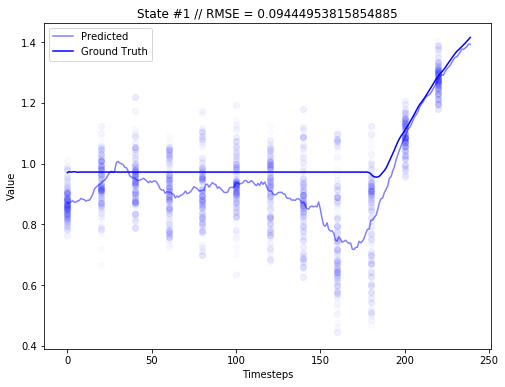

In [12]:
eval_experiment("dpf_mujoco_blackout8")